# Data Exploration

In [3]:
# Input Data
import pandas as pd
shoppers = pd.read_table('data/shoppers.txt', na_values = '\\N',names = ['shopper_date','Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators','shopper','date','visits','day_of_week_type','arrival'])
shoppers.shape

(285415, 16)

In [4]:
shoppers.head()

,shopper_date,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,shopper,date,visits,day_of_week_type,arrival
0,2017-01-02#297225,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297225,2017-01-02,81,1,11
1,2017-02-26#508299,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,508299,2017-02-26,4,0,10
2,2017-03-12#545218,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545218,2017-03-12,3,0,14
3,2017-01-24#762703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,762703,2017-01-24,2,2,12
4,2017-04-22#817932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,817932,2017-04-22,1,6,13


In [10]:
# Count number of unique shoppers
shoppers.shopper.nunique()

111534

In [16]:
# Calculate the average dwell in each column
zone_columns = ['Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators']
shoppers[zone_columns].mean()

Gallery King Furniture        38.251102
Ground BBQ Ranch              23.674745
Ground Dish Kiosk             59.222941
Ground Freedom                28.032471
Level 1 Dare Gallery          38.855041
Level 1 JB HiFi              224.639099
Level 1 Nick Scali            27.198296
Level 2 Harvey Norman        124.664746
Lower Ground Baby Bunting     27.277391
Lower Ground Escalators       12.965345
dtype: float64

Longest dwell is associated with the JB HiFi and Harvey Norman zones, both of which will have large numbers of smartphones and other WiFi enabled devices on permanent display.

In [5]:
# Calculate the average number of visits per shopper
print('Average visits per shopper: ',shoppers[['shopper','date']].groupby(['shopper']).agg(['count']).mean())

Average visits per shopper:  date  count    2.558995
dtype: float64


In [6]:
# Calculate min and max number of visits
print('Min ', shoppers[['visits']].min())
print('Max ', shoppers[['visits']].max())

Min  visits    1
dtype: int64
Max  visits    181
dtype: int64


In [ ]:
The Max visits number confirms devices are being seen every day.

## Plot shoppers per day

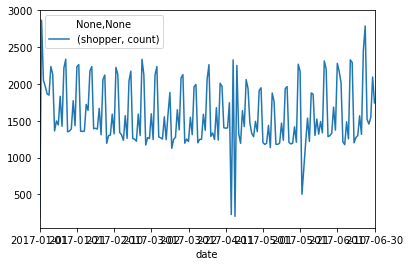

In [7]:
import matplotlib.pyplot as plt

daily_shoppers = shoppers[['shopper','date']].groupby(['date']).agg(['count'])

daily_shoppers_plt = daily_shoppers.plot()
plt.show(daily_shoppers_plt)

The two downward spikes are for Easter Friday and Easter Sunday when the centre was closed. Another two consecutive downward spike on 22-23 May was a backhaul connection outage.

## Plot shoppers by day of week

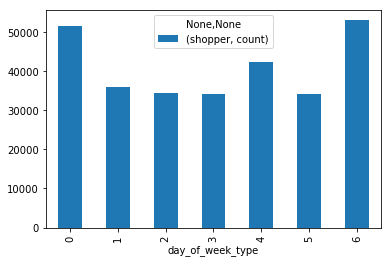

In [8]:
import matplotlib.pyplot as plt

dow_shoppers = shoppers[['shopper','day_of_week_type']].groupby(['day_of_week_type']).agg(['count'])

dow_shoppers_plt = dow_shoppers.plot(kind='bar')
plt.show(dow_shoppers_plt)

The profile shows the most popular shopping days are Saturday (6) and Sunday (0) followed by Thursday (4) when they centre is open for late night shopping.

## Plot shopper visits historgram

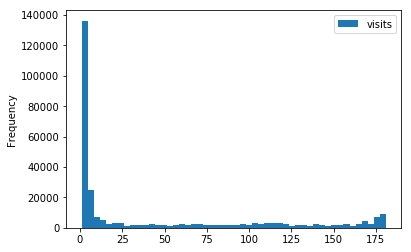

In [9]:
import matplotlib.pyplot as plt

shopper_visits = shoppers[['visits']]

shopper_visits_plt = shopper_visits.plot(kind='hist',bins=50)
plt.show(shopper_visits_plt)

Most shoppers only made one visit to the centre during the period.

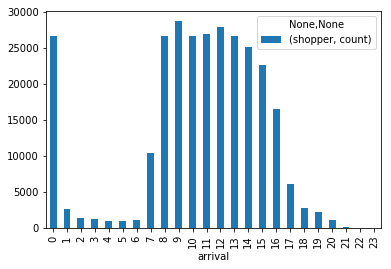

In [10]:
# Plot shopper visits by arrival time (hour)
import matplotlib.pyplot as plt

shopper_arrivals = shoppers[['shopper','arrival']].groupby(['arrival']).agg(['count'])

shopper_arrivals_plt = shopper_arrivals.plot(kind='bar')
plt.show(shopper_arrivals_plt)

# Proposed Clustering Techniques

Potential clustering techniques to be tried include:
- Linear SVC (sklearn.svm.LinearSVC)
- K-Means (sklearn.cluster.KMeans)
- DBScan (sklearn.cluster.dbscan)

## K-means

In [1]:
# Load libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [53]:
# Aggregate shopper visits by total minute in each zone
shoppers_agg = shoppers[['shopper']+['date']+zone_columns].groupby(['shopper']).sum()

# Convert NaN values to 0
shoppers_agg[np.isnan(shoppers_agg)] = 0
type(shoppers_agg)

pandas.core.frame.DataFrame

In [67]:
# Run K-means clustering for 11 clusters
K_count = 11
est = KMeans(n_clusters=K_count, init='random')
est.fit(shoppers_agg)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
# Calculate the number of members in each cluster
unique, counts = np.unique(est.labels_, return_counts=True)

# Create a new DF with the clusters and number of members
member_count = pd.DataFrame(data=counts,
                            index=unique,
                            columns=["members"])
member_count.index.name = "label"

# Create a new DF with the clusters and their associated centres
clusters = pd.DataFrame(data=est.cluster_centers_,
                        index=unique,
                        columns=zone_columns)

# Join the member count DF to the clusters DF and round the centre numerics to 0 decimal places
member_count.join(clusters).round(0)

,members,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators
label,,,,,,,,,,,
0,112,7.0,441.0,20.0,1182.0,4382.0,31899.0,364.0,12.0,2.0,336.0
1,18,38777.0,54.0,1785.0,4.0,74.0,951.0,398.0,396.0,8.0,3.0
2,27,87.0,-0.0,131.0,0.0,1.0,-0.0,2241.0,123511.0,-0.0,-0.0
3,41,9.0,751.0,66815.0,0.0,727.0,0.0,1079.0,1097.0,-0.0,0.0
4,15,0.0,11.0,2.0,225.0,0.0,3.0,2.0,1.0,38371.0,10148.0
5,38,1.0,7.0,9.0,0.0,0.0,0.0,4.0,66032.0,0.0,0.0
6,110974,7.0,7.0,12.0,10.0,9.0,15.0,4.0,17.0,7.0,3.0
7,101,2.0,333.0,2.0,1.0,4593.0,73763.0,592.0,3.0,0.0,0.0
8,85,4.0,11.0,11.0,1.0,7.0,1.0,18.0,24304.0,1.0,0.0


In [114]:
# Calculate number of static devices or staff
member_count.sum() - member_count[6:7].sum()

members    560
dtype: int64

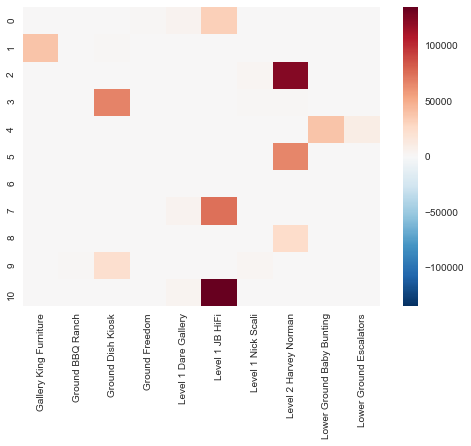

In [72]:
# Plot the centres as a heat map
import seaborn as sns
sns.heatmap(clusters)

Running a basic K-means clustering on the data with 11 clusters identifies static devices or staff who are associated with a particular zone or retailer. 

For example
- Cluster 2 appears to be 27 static devices in Harvey Norman
- Clusters 4 represent 15 static devices which can be detected in both Lower Ground Floor zones 
- Cluster 10 represents 45 static devices in JB HiFi

In [84]:
# Add the cluster label to our original shoppers DF
shoppers_agg_clustered = shoppers_agg.join(pd.DataFrame(data=est.labels_,columns=["cluster"]))

shoppers_agg_clustered

,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,cluster
shopper,,,,,,,,,,,
41,0.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
1042,0.0,25.0,20.0,7.0,2.0,33.0,0.0,20.0,2.0,2.0,6.0
2994,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
5844,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,6.0
6173,8.0,0.0,27.0,34.0,45.0,8.0,1.0,5.0,2.0,0.0,6.0
7370,0.0,3.0,16.0,19.0,0.0,21.0,6.0,30.0,0.0,2.0,6.0
7529,0.0,14.0,11.0,10.0,0.0,10.0,2.0,85.0,4.0,4.0,6.0
7590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
7778,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


Still to do:
- Run clustering excluding static devices and staff
- Look at other ways to identify static devices & staff e.g. number of visits
- Use Silhouette score to determine the best number of clusters